In [1]:
import numpy as np
from scipy.stats import invgamma, norm
from matplotlib import pyplot as plt

In [32]:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
  'font.size': 12,
    'figure.titlesize': 14,
    'legend.fontsize': 11
})

In [26]:
def update_parameters(mu0,sigma0,k0,v0,n,meanY,s):
    kn = np.array([k0 + n[i] for i in range(2)])
    mun = np.array([(k0*mu0 + n[i]*meanY[i])/kn[i] for i in range(2)])
    vn = np.array([v0 + n[i] for i in range(2)])
    sigman = np.array([(v0*sigma0 + (n[i]-1)*s[i] + k0*n[i]*(meanY[i]-mu0)**2/kn[i]) 
                       for i in range(2)])
    return kn, mun, vn, sigman

In [27]:
def MC_sample(kn, mun, vn, sigman, size):    
    sigma = invgamma.rvs(a=vn/2, scale=2/(vn*sigman), size=size) # ? scale ?
    theta = norm.rvs(loc=mun, scale=np.sqrt(sigman/kn), size=size)
    Ytilda = norm.rvs(loc=theta, scale=np.sqrt(sigma), size=size)
    return theta, sigma, Ytilda

In [33]:
n = np.array([16,16])
meanY = np.array([75.2, 77.5])
s = np.array([7.3, 8.1])
mu0 = 75
sigma0 = 100
n_points = 13
k0 = np.array([2**i for i in range(n_points)])
v0 = np.array([2**i for i in range(n_points)])
size = 10000

### b) Apply MC sampler

In [34]:
res = np.zeros(n_points)
for j in range(n_points):
    theta = np.zeros((2, size))
    kn, mun, vn, sigman = update_parameters(mu0,sigma0,k0[j],v0[j],n,meanY,s)
    for i in range(2):
        theta[i], _, _ = MC_sample(kn=kn[i], mun=mun[i], vn=vn[i], sigman=sigman[i], size=size)
    res[j] = np.sum((theta[0]<theta[1]))/size

In [35]:
res

array([0.6721, 0.6336, 0.5946, 0.5637, 0.5407, 0.5289, 0.5052, 0.5059,
       0.509 , 0.5044, 0.5023, 0.5088, 0.5032])

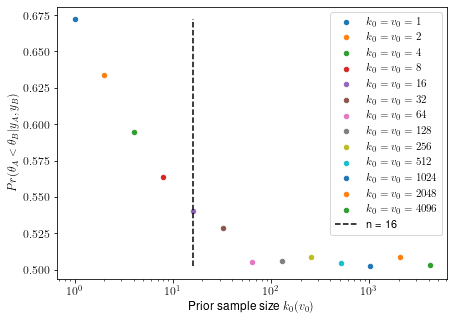

In [36]:
plt.figure(figsize = (7,5))

for i in range(n_points):
    plt.scatter(k0[i], res[i], s = 20, label = '$k_0=v_0={}$'.format(k0[i]))
plt.vlines(n[0], min(res), max(res), ls = '--',color = 'k', label = 'n = 16')
plt.xscale('log')
plt.legend()
# loc='center left', bbox_to_anchor=(1, 0.5)
plt.xlabel('Prior sample size $k_0 (v_0)$')
plt.ylabel('$Pr(\\theta_A < \\theta_B | y_A, y_B)$')

plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex2_3_Fig1.png')